<h1>Projet numérique : choix du pas de temps</h1>
<h5>Clémentine VANNIER, Nastassia TARDY</h5>


<h2>Pas fixe</h2>

Tout d'abord, on s'intéresse à l'implémentation d'un schéma d'<strong>ordre 1</strong>. 

Pour tester l'algorithme, on s'intéresse à la résolution de <i>f(x) = x</i>, qui admet comme solution la fonction exponentielle. On impose la condition initiale <i>x(t=0) = 1</i>. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def solve_euler_explicit(f, x0, dt, a, b):
    """
    - on calcule sur une fenêtre temporelle [a, b]
    - cette fonction implémente la méthode d'Euler explicite (ordre 1)
    """
    liste_x, liste_t = [x0], [dt]
    x, t = x0, a
    while t < b:
        x += f(x)*dt
        t += dt
        liste_x.append(x)
        liste_t.append(t)
    return (np.array(liste_t), np.array(liste_x))

In [99]:
def fonction (x):
    return -x

def test(a, b):
    ListePas = [0.001, 0.01, 0.1, 0.3, 0.5]
    ListeT, ListeX = [], []
    for pas in ListePas:
        vecteurT, vecteurX = solve_euler_explicit(fonction, 1, pas, a, b)
        ListeT.append(vecteurT)
        ListeX.append(vecteurX)
    for i in range (5):
        plt.plot(ListeT[i], ListeX[i], label="pas = "+str(ListePas[i]))
    theorique = [np.exp(-t) for t in ListeT[0]]
    plt.plot(ListeT[0], theorique, label="Courbe théorique")
    plt.xlabel("temps")
    plt.ylabel("x")
    plt.legend(loc=9)
    plt.title("Pas fixe (méthode d'Euler explicite)")
    plt.grid()
    plt.show()
    
def convergence(a, b):
    ListePas = [0.1, 0.01, 0.001, 0.0001, 0.00001]
    ListeT, ListeX = [], []
    for pas in ListePas:
        vecteurT, vecteurX = solve_euler_explicit(fonction, 1, pas, a, b)
        ListeT.append(vecteurT)
        ListeX.append(vecteurX)
    ListeTheorique = [np.array([np.exp(-t) for t in ListeT[i]]) for i in range (len(ListeT))]
    ListeErreur = [np.abs(ListeTheorique[i] - ListeX[i]) for i in range (len(ListeX))]
    plt.figure()
    for i in range (len(ListePas)):
        plt.plot(ListeT[i], ListeErreur[i], label = "pas = "+str(ListePas[i]))
    plt.xlabel("temps")
    plt.ylabel("x")
    plt.legend(loc=9)
    plt.title("Erreur en fonction du temps, selon le pas choisi (méthode d'Euler explicite)")
    plt.grid()
    plt.show()

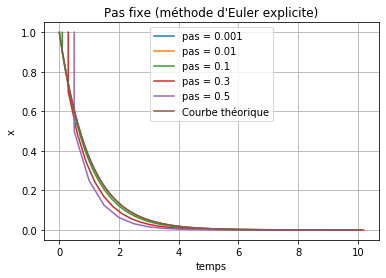

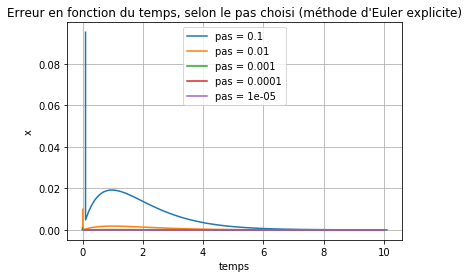

In [100]:
test(0,10)
convergence(0,10)

L'algorithme converge bien, car l'erreur tend vers 0. 

On s'intéresse ensuite à l'implémentation similaire d'un schéma d'<strong>ordre 2</strong>. On choisit ici la méthode de Heun. Le test des performances de l'algorithme est réalisé de manière analogue. 

In [26]:
def solve_heun_explicit(f, x0, dt, a, b):
    """
    - on calcule sur une fenêtre temporelle [a, b]
    - f dépend de t et de x
    """
    liste_x, liste_t = [x0], [dt]
    x, t = x0, a
    while t < b:
        A = f(t, x) + f(t+dt, x+dt*f(t,x))
        x += (dt/2)*A
        t += dt
        liste_x.append(x)
        liste_t.append(t)
    return (np.array(liste_t), np.array(liste_x))

def fonction_2(t,x):
    return -x

def test_2(a, b):
    ListePas = [0.0001, 0.001, 0.01, 0.1, 1]
    ListeT, ListeX = [], []
    for pas in ListePas:
        vecteurT, vecteurX = solve_heun_explicit(fonction_2, 1, pas, a, b)
        ListeT.append(vecteurT)
        ListeX.append(vecteurX)
    for i in range (5):
        plt.plot(ListeT[i], ListeX[i], label="pas = "+str(ListePas[i]))
    theorique = [np.exp(-t) for t in ListeT[0]]
    plt.plot(ListeT[0], theorique, label="Courbe théorique")
    plt.xlabel("temps")
    plt.ylabel("x")
    plt.legend(loc=9)
    plt.title("Pas fixe (méthode de Heun)")
    plt.grid()
    plt.show()


def convergence_2(a, b):
    ListePas = [0.1, 0.01, 0.001, 0.0001, 0.00001]
    ListeT, ListeX = [], []
    for pas in ListePas:
        vecteurT, vecteurX = solve_heun_explicit(fonction_2, 1, pas, a, b)
        ListeT.append(vecteurT)
        ListeX.append(vecteurX)
    ListeTheorique = [np.array([np.exp(-t) for t in ListeT[i]]) for i in range (len(ListeT))]
    ListeErreur = [np.abs(ListeTheorique[i] - ListeX[i]) for i in range (len(ListeX))]
    plt.figure()
    for i in range (len(ListePas)):
        plt.plot(ListeT[i][10: len(ListeT[i])-1], ListeErreur[i][10: len(ListeT[i])-1], label = "pas = "+str(ListePas[i]))
    plt.xlabel("temps")
    plt.ylabel("x")
    plt.legend(loc=9)
    plt.title("Erreur en fonction du temps, selon le pas choisi (méthode de Heun)")
    plt.grid()
    plt.show()

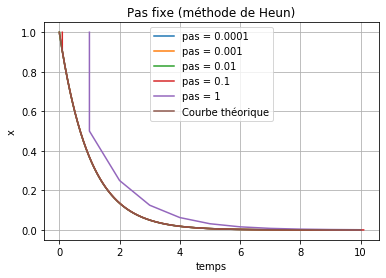

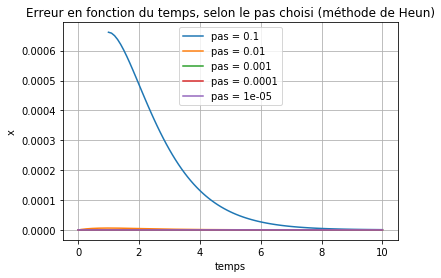

In [27]:
test_2(0,10)
convergence_2(0,10)

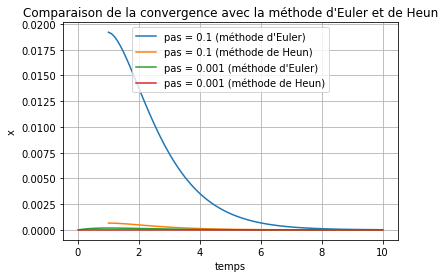

In [28]:
def comparaison_des_schemas(a, b, pas1, pas2):
    """
    - on compare la convergence des deux schémas (d'ordre 1 et 2 respectivement)
    - cette comparaison est effectuée pour deux pas donnés pas1 et pas2
    """
    ListeT_Euler, ListeX_Euler = [], []
    ListeT_Heun, ListeX_Heun = [], []
    ListePas = [pas1, pas2]

    for pas in ListePas:
        vecteurT_Euler, vecteurX_Euler = solve_euler_explicit(fonction, 1, pas, a, b)
        vecteurT_Heun, vecteurX_Heun = solve_heun_explicit(fonction_2, 1, pas, a, b)
        ListeT_Euler.append(vecteurT_Euler)
        ListeX_Euler.append(vecteurX_Euler)
        ListeT_Heun.append(vecteurT_Heun)
        ListeX_Heun.append(vecteurX_Heun)

    ListeTheorique = [np.array([np.exp(-t) for t in ListeT_Euler[i]]) for i in range (len(ListeX_Euler))] #les listes sont identiques pour la méthode de Heun et d'Euler
    ListeErreur_Euler = [np.abs(ListeTheorique[i] - ListeX_Euler[i]) for i in range (len(ListeX_Euler))]
    ListeErreur_Heun = [np.abs(ListeTheorique[i] - ListeX_Heun[i]) for i in range (len(ListeX_Heun))]

    #Affichage
    plt.figure()
    for i in range (len(ListePas)):
        plt.plot(ListeT_Euler[i][10: len(ListeT_Euler[i])-1], ListeErreur_Euler[i][10: len(ListeT_Euler[i])-1], label = "pas = "+str(ListePas[i])+" (méthode d'Euler)")
        plt.plot(ListeT_Heun[i][10: len(ListeT_Heun[i])-1], ListeErreur_Heun[i][10: len(ListeT_Heun[i])-1], label = "pas = "+str(ListePas[i])+" (méthode de Heun)")
    plt.xlabel("temps")
    plt.ylabel("x")
    plt.legend(loc=9)
    plt.title("Comparaison de la convergence avec la méthode d'Euler et de Heun")
    plt.grid()
    plt.show()

comparaison_des_schemas(0,10,0.1,0.001) 

Avec les courbes ci-dessus, on observe bien que la méthode d'ordre 2 converge plus rapidement vers la valeur théorique, et ce quel que soit le pas choisi. 

<h2>Adaptation du pas de temps</h2>

<h3>Question n°1</h3>

![40% center](image12.jpg)

<h3>Question n°2</h3>

![40% center](image22.jpg)

Par le résultat précédent, si l'on double l'erreur, on divise le pas de temps par √2. 
Ceci est bien réalisé dans la formule proposée pour le nouveau pas de temps <i>dtnew</i>, et justifie donc l'utilisation de cette formule pour le code général. 

<h3>Question n°3</h3>

<strong>Explication du fonctionnement</strong>

La première boucle while parcourt l'ensemble de l'intervalle de temps étudié. 
La deuxième permet de faire varier le nombre de points supplémentaires à ajouter, en fonction de l'erreur obtenue. On utilise ti pour se rendre compte de l'endroit où l'on en est dans la boucle. 
Ainsi, on affecte à dt une nouvelle valeur, calculée à l'aide de la formule de Q2 que l'on multiplie par 0.9 (qui joue ici le rôle d'une marge de sécurité). 

<strong>Illustration du fonctionnement</strong>

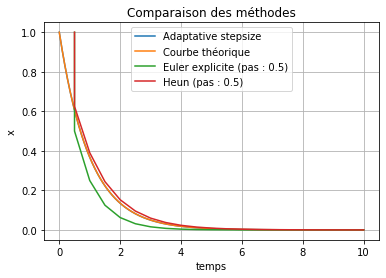

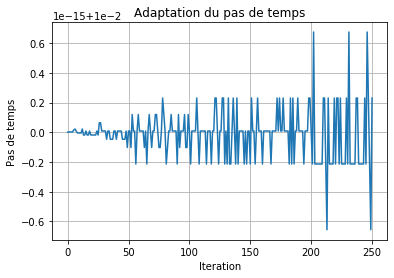

In [93]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * np.sqrt(ratio_abs_error)
            # 0.9 correspond à la marge de sécurité appliquée ici
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        #ts = np.vstack([ts,t_next])
        #xs = np.vstack([xs,x_next])
        ts.append(t_next)
        xs.append(x_next)
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs)

# On vérifie d'abord que le fonctionnement du solveur est cohérent,
# par rapport aux valeurs théoriques, et celles obtenues par les deux
# méthodes de pas fixe. 
def test_3(f, fh, t0, x0, t_f, pas):
    t, x = solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f)
    t_e, x_e = solve_euler_explicit(f, x0, pas, t0, t_f)
    t_h, x_h = solve_heun_explicit(fh, x0, pas, t0, t_f)
    
    
    plt.figure()
    plt.plot(t,x, label="Adaptative stepsize")
    plt.plot(t, [np.exp(-a) for a in t], label="Courbe théorique")
    plt.plot(t_e, x_e, label="Euler explicite (pas : "+str(pas)+")")
    plt.plot(t_h, x_h, label="Heun (pas : "+str(pas)+")")
    
    plt.xlabel('temps')
    plt.ylabel('x')
    plt.legend(loc=9)
    plt.title("Comparaison des méthodes")
    plt.grid()
    plt.show()

test_3(fonction, fonction_2, 0, 1, 10, 0.5)


# Illustration du fonctionnement du solveur
t, x = solve_ivp_euler_explicit_variable_step(fonction, 0, 1, 10)

pasDeTemps = [(t[i+1] - t[i]) for i in range (len(t)-1)]
iteration = [i for i in range (len(t)-1)]
plt.show()
plt.figure()
plt.xlabel("Iteration")
plt.ylabel("Pas de temps")
plt.plot(iteration[0:251], pasDeTemps[0:251]) #on limite le nombre d'itérations affichées pour des questions de lisibilité du graphique
#plt.plot(iteration, pasDeTemps)
plt.title("Adaptation du pas de temps")
plt.grid()
plt.show()




La méthode avec adaptation du pas de temps est très efficace, comme le montre la courbe de <i>comparaison des méthodes</i>.
La deuxième courbe montre l'évolution du pas de temps. 